# Task 4 - Implement QNPy  for quasar light curve modeling

## Preprocess data

In [1]:
import sys
print(sys.version)

3.9.21 (main, Dec 11 2024, 10:23:52) 
[Clang 14.0.6 ]


In [2]:
#pip install QNPy

In [3]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [4]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 
# In this example we used pandas python package for importing the .csv data, but numpy can be used if the data is 
#in .txt file
path = './light_curves' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

In [5]:
#Cleaning the outliers second approach
#This function not only cleans data by removing outliers but also aggregates time and fluxes, 
#computing a weighted average of magnitudes for closely spaced time points, 
#and then saves the cleaned and aggregated files.

input_folder = './light_curves'
output_folder = './light_curves_clean'
threshold_aggregation = 5
threshold_outliers = 3.0

outliers=pr.clean_save_aggregate_data(input_folder, output_folder, threshold_aggregation, threshold_outliers)

Cleaned and saved 6.csv to ./light_curves_clean/6.csv
Cleaned and saved 7.csv to ./light_curves_clean/7.csv
Cleaned and saved 5.csv to ./light_curves_clean/5.csv
Cleaned and saved 4.csv to ./light_curves_clean/4.csv
Cleaned and saved 1.csv to ./light_curves_clean/1.csv
Cleaned and saved 3.csv to ./light_curves_clean/3.csv
Cleaned and saved 2.csv to ./light_curves_clean/2.csv
Cleaned and saved 20.csv to ./light_curves_clean/20.csv
Cleaned and saved 19.csv to ./light_curves_clean/19.csv
Cleaned and saved 18.csv to ./light_curves_clean/18.csv
Cleaned and saved 16.csv to ./light_curves_clean/16.csv
Cleaned and saved 17.csv to ./light_curves_clean/17.csv
Cleaned and saved 15.csv to ./light_curves_clean/15.csv
Cleaned and saved 14.csv to ./light_curves_clean/14.csv
Cleaned and saved 10.csv to ./light_curves_clean/10.csv
Cleaned and saved 11.csv to ./light_curves_clean/11.csv
Cleaned and saved 13.csv to ./light_curves_clean/13.csv
Cleaned and saved 12.csv to ./light_curves_clean/12.csv
Cleane

In [6]:

# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 
# If you previously removed the outliers from your light curves and saved the new one 
#in the folder light_curves_clean, here you use this folder insted of "./light_curves"

padding= pr.backward_pad_curves('./light_curves_clean', './Padded_lc', desired_observations=100)

Created new file: ./Padded_lc/6.csv
Created new file: ./Padded_lc/7.csv
Created new file: ./Padded_lc/5.csv
Created new file: ./Padded_lc/4.csv
Created new file: ./Padded_lc/1.csv
Created new file: ./Padded_lc/3.csv
Created new file: ./Padded_lc/2.csv
Created new file: ./Padded_lc/20.csv
Created new file: ./Padded_lc/19.csv
Created new file: ./Padded_lc/18.csv
Created new file: ./Padded_lc/16.csv
Created new file: ./Padded_lc/17.csv
Created new file: ./Padded_lc/15.csv
Created new file: ./Padded_lc/14.csv
Created new file: ./Padded_lc/10.csv
Created new file: ./Padded_lc/11.csv
Created new file: ./Padded_lc/13.csv
Created new file: ./Padded_lc/12.csv
Created new file: ./Padded_lc/9.csv
Created new file: ./Padded_lc/8.csv


In [7]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

In [8]:
#listing the data that are going to be transformed. 
#In case that your original data is in one table, this is not needed
files = os.listdir(DATA_SRC) 

In [9]:
#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

# Splitting and Training

## Split

In [10]:

import QNPy #Importing the package
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

In [11]:
DATA_SRC = "./preproc" #Path to transformed data

In [12]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [13]:
#creating the folders for saving the splitted data
st.create_split_folders(train_folder='./dataset/train/', test_folder='./dataset/test/', val_folder='./dataset/val/')

In [14]:

#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 
#You can directly enter this informations in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [15]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 414.47it/s]


## Train

In [16]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

In [17]:
BATCH_SIZE=20 #Defining the batch size, it should remain 20

In [18]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

In [19]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
device

device(type='cpu')

In [20]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [21]:
import sklearn
print(sklearn.__version__)

1.6.1


In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
import inspect
print("MSE function being used is from:", inspect.getfile(mean_squared_error))

MSE function being used is from: /Users/jamiehoskyns/opt/anaconda3/envs/task4/lib/python3.9/site-packages/sklearn/utils/_param_validation.py


In [24]:
# function for training the data
# numbers that we give in this example are: 
#1 - number of train_model function runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 3000, 2000, mseMetric, maeMetric, device)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [07:33<00:00,  6.62it/s]


In [25]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [26]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [27]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'  

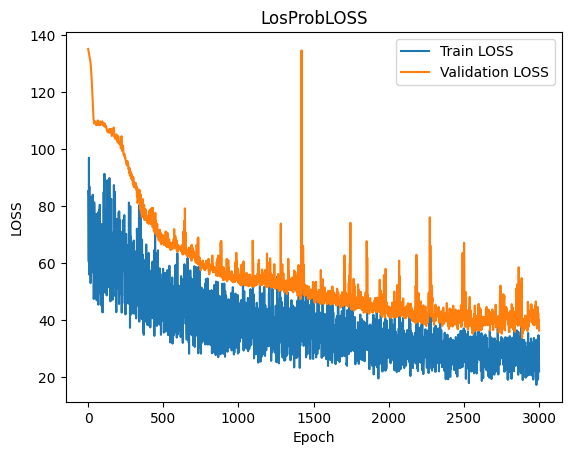

In [28]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [29]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'  
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'  

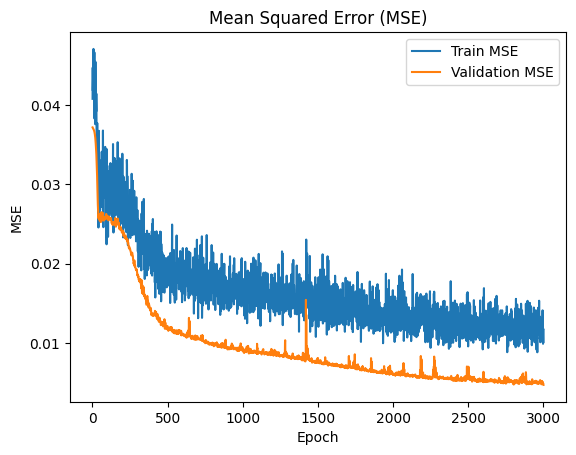

In [30]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [31]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'  
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'  

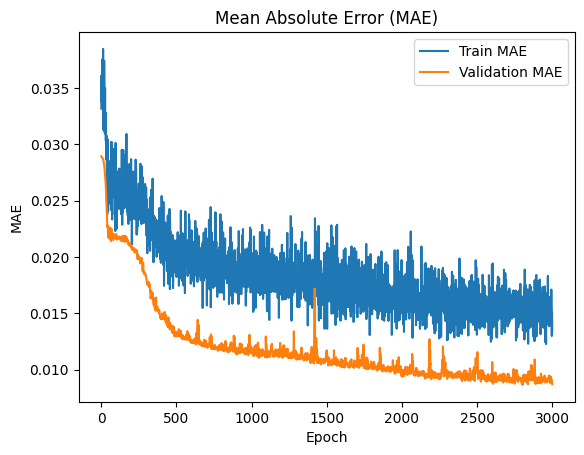

In [32]:

#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [33]:
save=st.save_model(model, MODEL_PATH)#saving the trained model

# Prediction and ploting

In [34]:

import QNPy #Importing the package
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [35]:
#defining the device, it can be cpu or cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [36]:
# Creating all needed folders
# If you already manually created prediction folders, this can be scipped
pop.create_prediction_folders()

Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [37]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [38]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped

In [39]:
model = pop.load_model(MODEL_PATH, device)#loading trained model

In [40]:
criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics

In [41]:

#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 6_original_split22.csv
Deleted file with 'minus' or 'plus' in the name: 1_minus_split0.csv
Removed padding in file: 3_original_split22.csv
Removed padding in file: 17_original_split42.csv
Deleted file with 'minus' or 'plus' in the name: 3_minus_split31.csv
Deleted file with 'minus' or 'plus' in the name: 8_minus_split45.csv
Removed padding in file: 20_original_split38.csv
Deleted file with 'minus' or 'plus' in the name: 12_minus_split18.csv
Deleted file with 'minus' or 'plus' in the name: 10_minus_split50.csv
Deleted file with 'minus' or 'plus' in the name: 6_plus_split33.csv


In [42]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 9_original_split23.csv
Deleted file with 'minus' or 'plus' in the name: 20_plus_split32.csv
Deleted file with 'minus' or 'plus' in the name: 19_minus_split26.csv
Removed padding in file: 15_original_split15.csv
Removed padding in file: 13_original_split25.csv
Removed padding in file: 16_original_split30.csv
Deleted file with 'minus' or 'plus' in the name: 20_minus_split7.csv
Removed padding in file: 18_original_split8.csv
Deleted file with 'minus' or 'plus' in the name: 6_minus_split23.csv
Deleted file with 'minus' or 'plus' in the name: 1_plus_split51.csv
Removed padding in file: 2_original_split35.csv
Deleted file with 'minus' or 'plus' in the name: 4_minus_split52.csv
Deleted file with 'minus' or 'plus' in the name: 5_minus_split41.csv
Deleted file with 'minus' or 'plus' in the name: 15_plus_split40.csv
Removed padding in file: 7_original_split27.csv
Deleted file with 'minus' or 'plus' in the name: 12_plus_split58.csv
Removed padding in file: 3_original_spli

In [43]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 8_original_split55.csv
Deleted file with 'minus' or 'plus' in the name: 14_minus_split28.csv
Deleted file with 'minus' or 'plus' in the name: 9_plus_split17.csv
Removed padding in file: 5_original_split17.csv
Removed padding in file: 11_original_split29.csv
Deleted file with 'minus' or 'plus' in the name: 8_plus_split16.csv
Removed padding in file: 2_original_split16.csv
Removed padding in file: 8_original_split28.csv
Removed padding in file: 1_original_split19.csv
Removed padding in file: 10_original_split19.csv
Deleted file with 'minus' or 'plus' in the name: 5_plus_split10.csv
Deleted file with 'minus' or 'plus' in the name: 2_minus_split49.csv
Removed padding in file: 6_original_split10.csv


In [44]:
tr=pop.load_trcoeff()#loading the transformation coeff

In [45]:
testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data

In [46]:
trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data

In [47]:
valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

  0%|                                                                                                                           | 0/4 [00:00<?, ?it/s]

/Users/jamiehoskyns/opt/anaconda3/envs/task4/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:406: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 75%|██████████████████████████████████████████████████████████████████████████████████████▎                            | 3/4 [00:00<00:00, 26.96it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 28.20it/s]


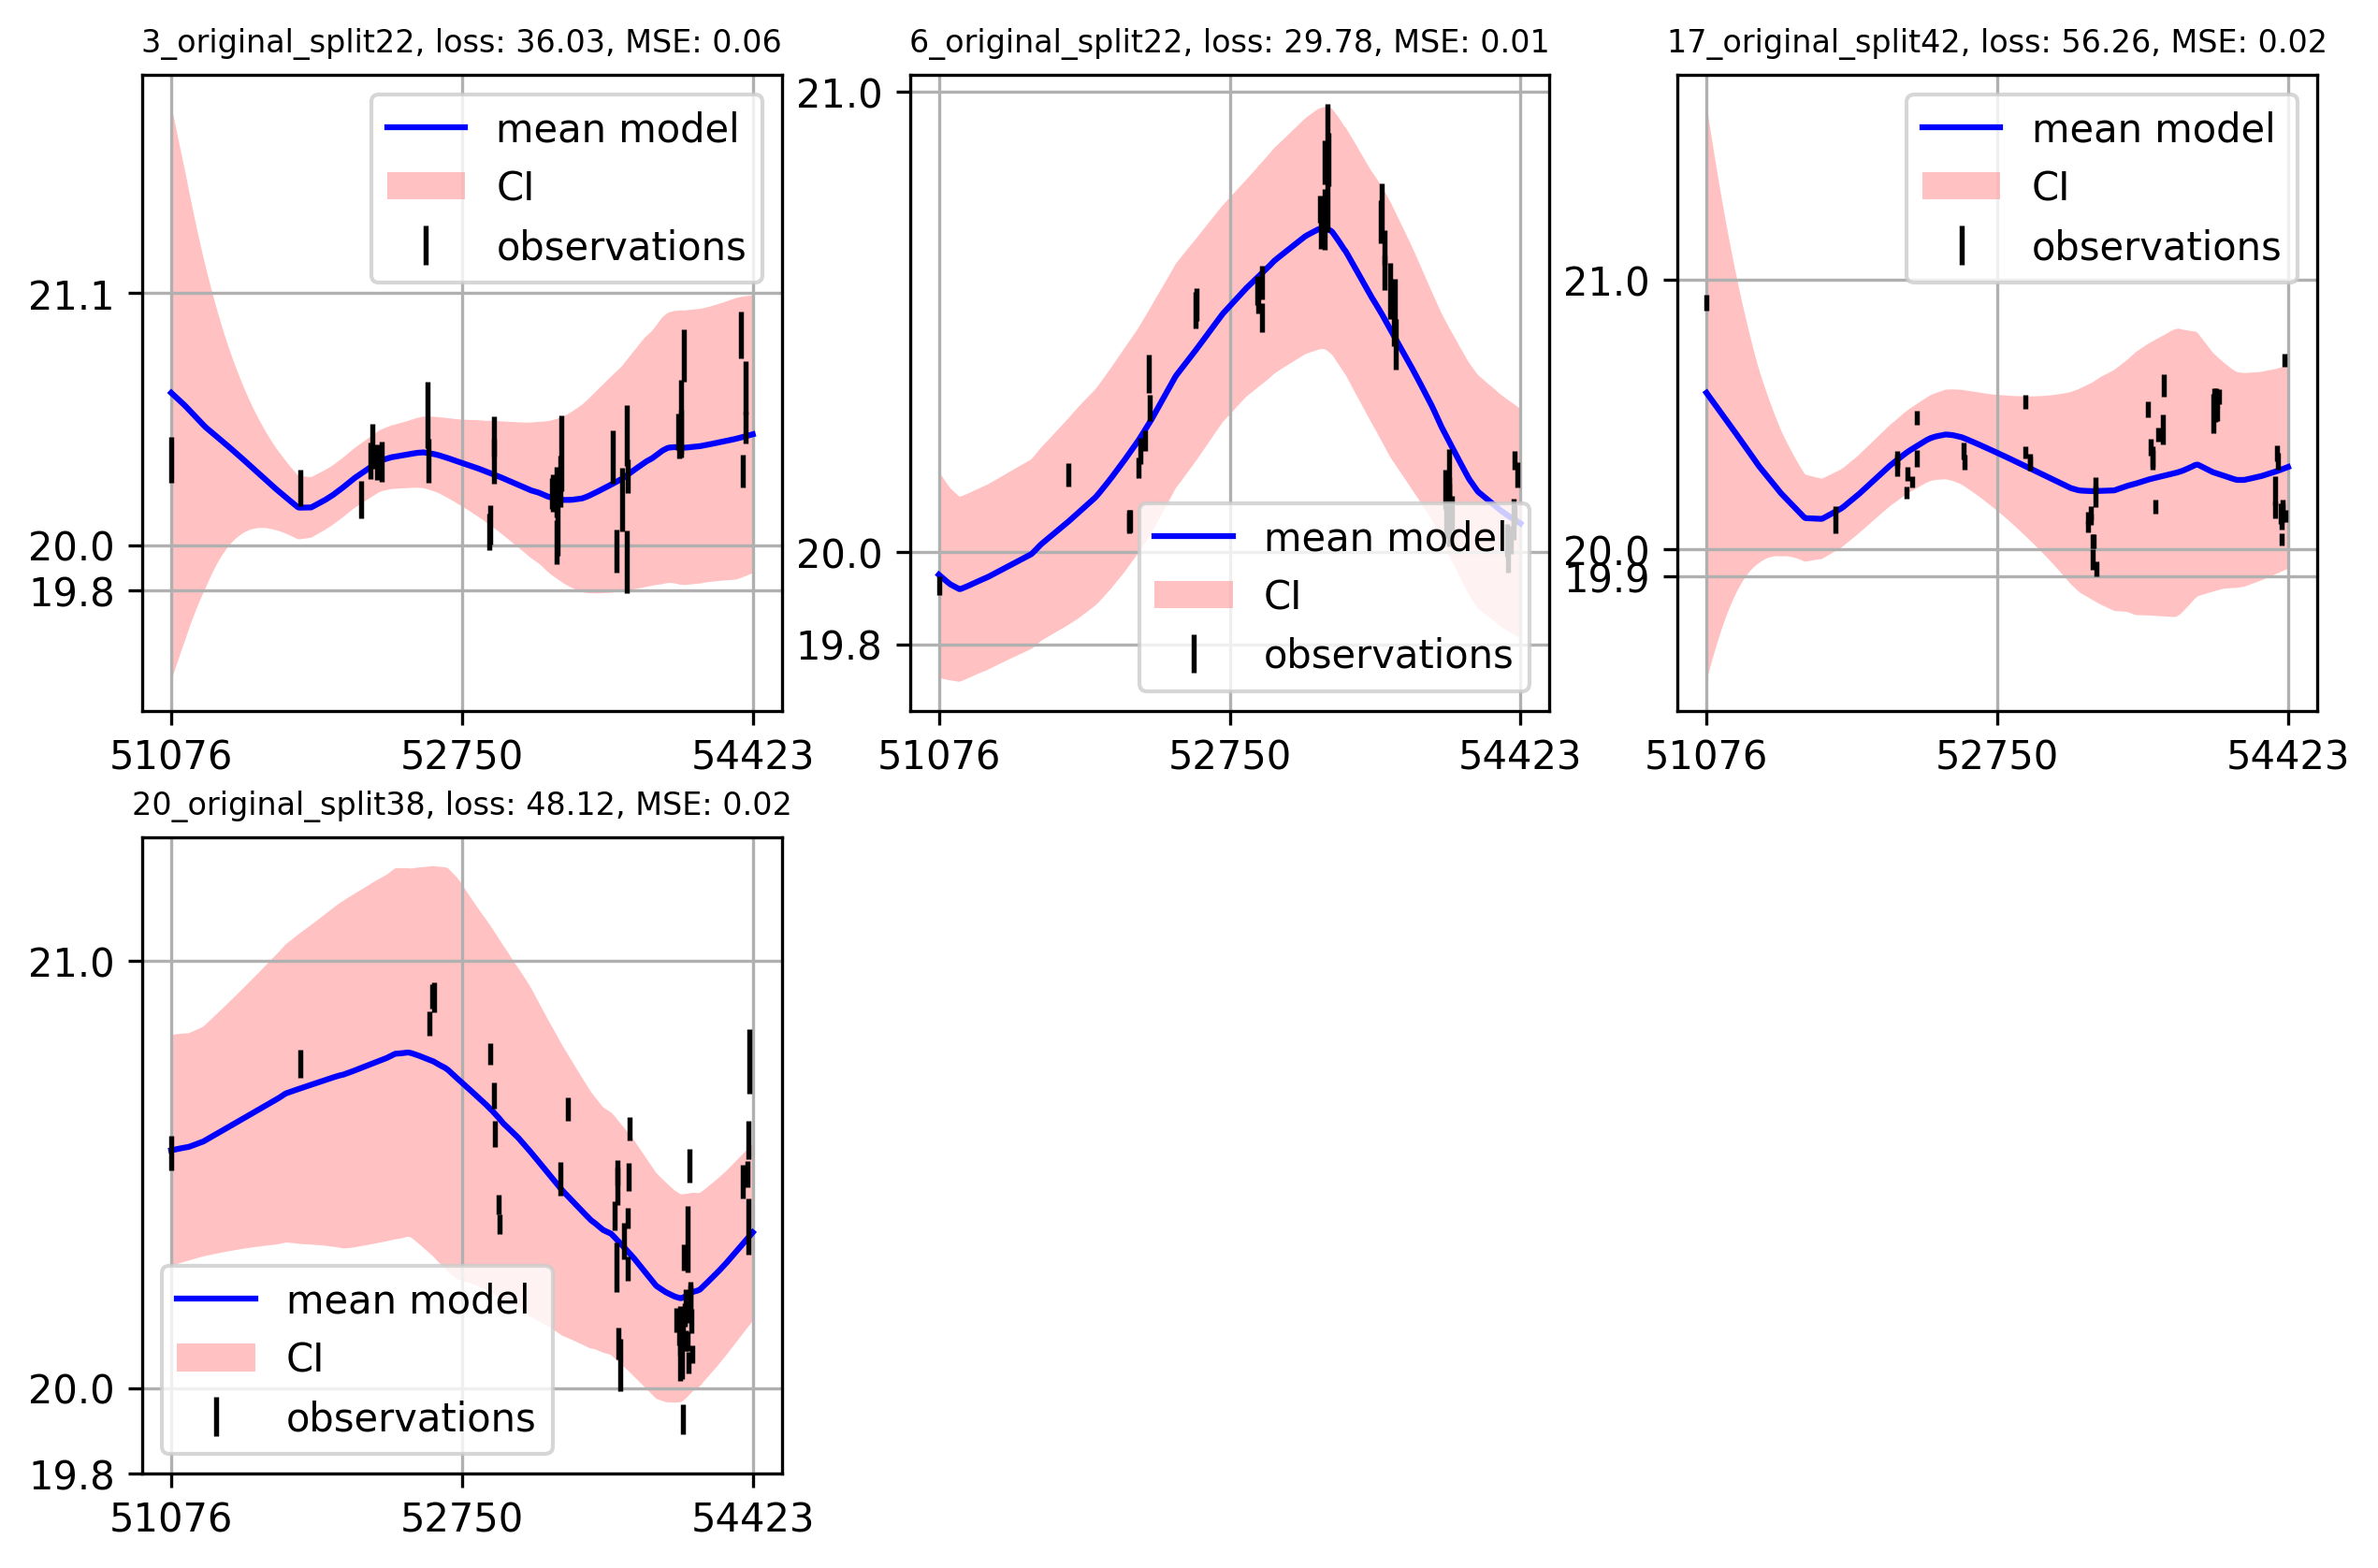

In [48]:
#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

In [49]:
savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics

  0%|                                                                                                                          | 0/18 [00:00<?, ?it/s]/Users/jamiehoskyns/opt/anaconda3/envs/task4/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:524: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 22%|█████████████████████████▎                                                                                        | 4/18 [00:00<00:01,  8.50it/s]

 39%|████████████████████████████████████████████▎                                                                     | 7/18 [00:00<00:00, 13.42it/s]

/Users/jamiehoskyns/opt/anaconda3/envs/task4/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:524: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 78%|███████████████████████████████████████████████████████████████████████████████████████▉                         | 14/18 [00:01<00:00, 10.64it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 17/18 [00:01<00:00, 13.22it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:02<00:00,  7.89it/s]


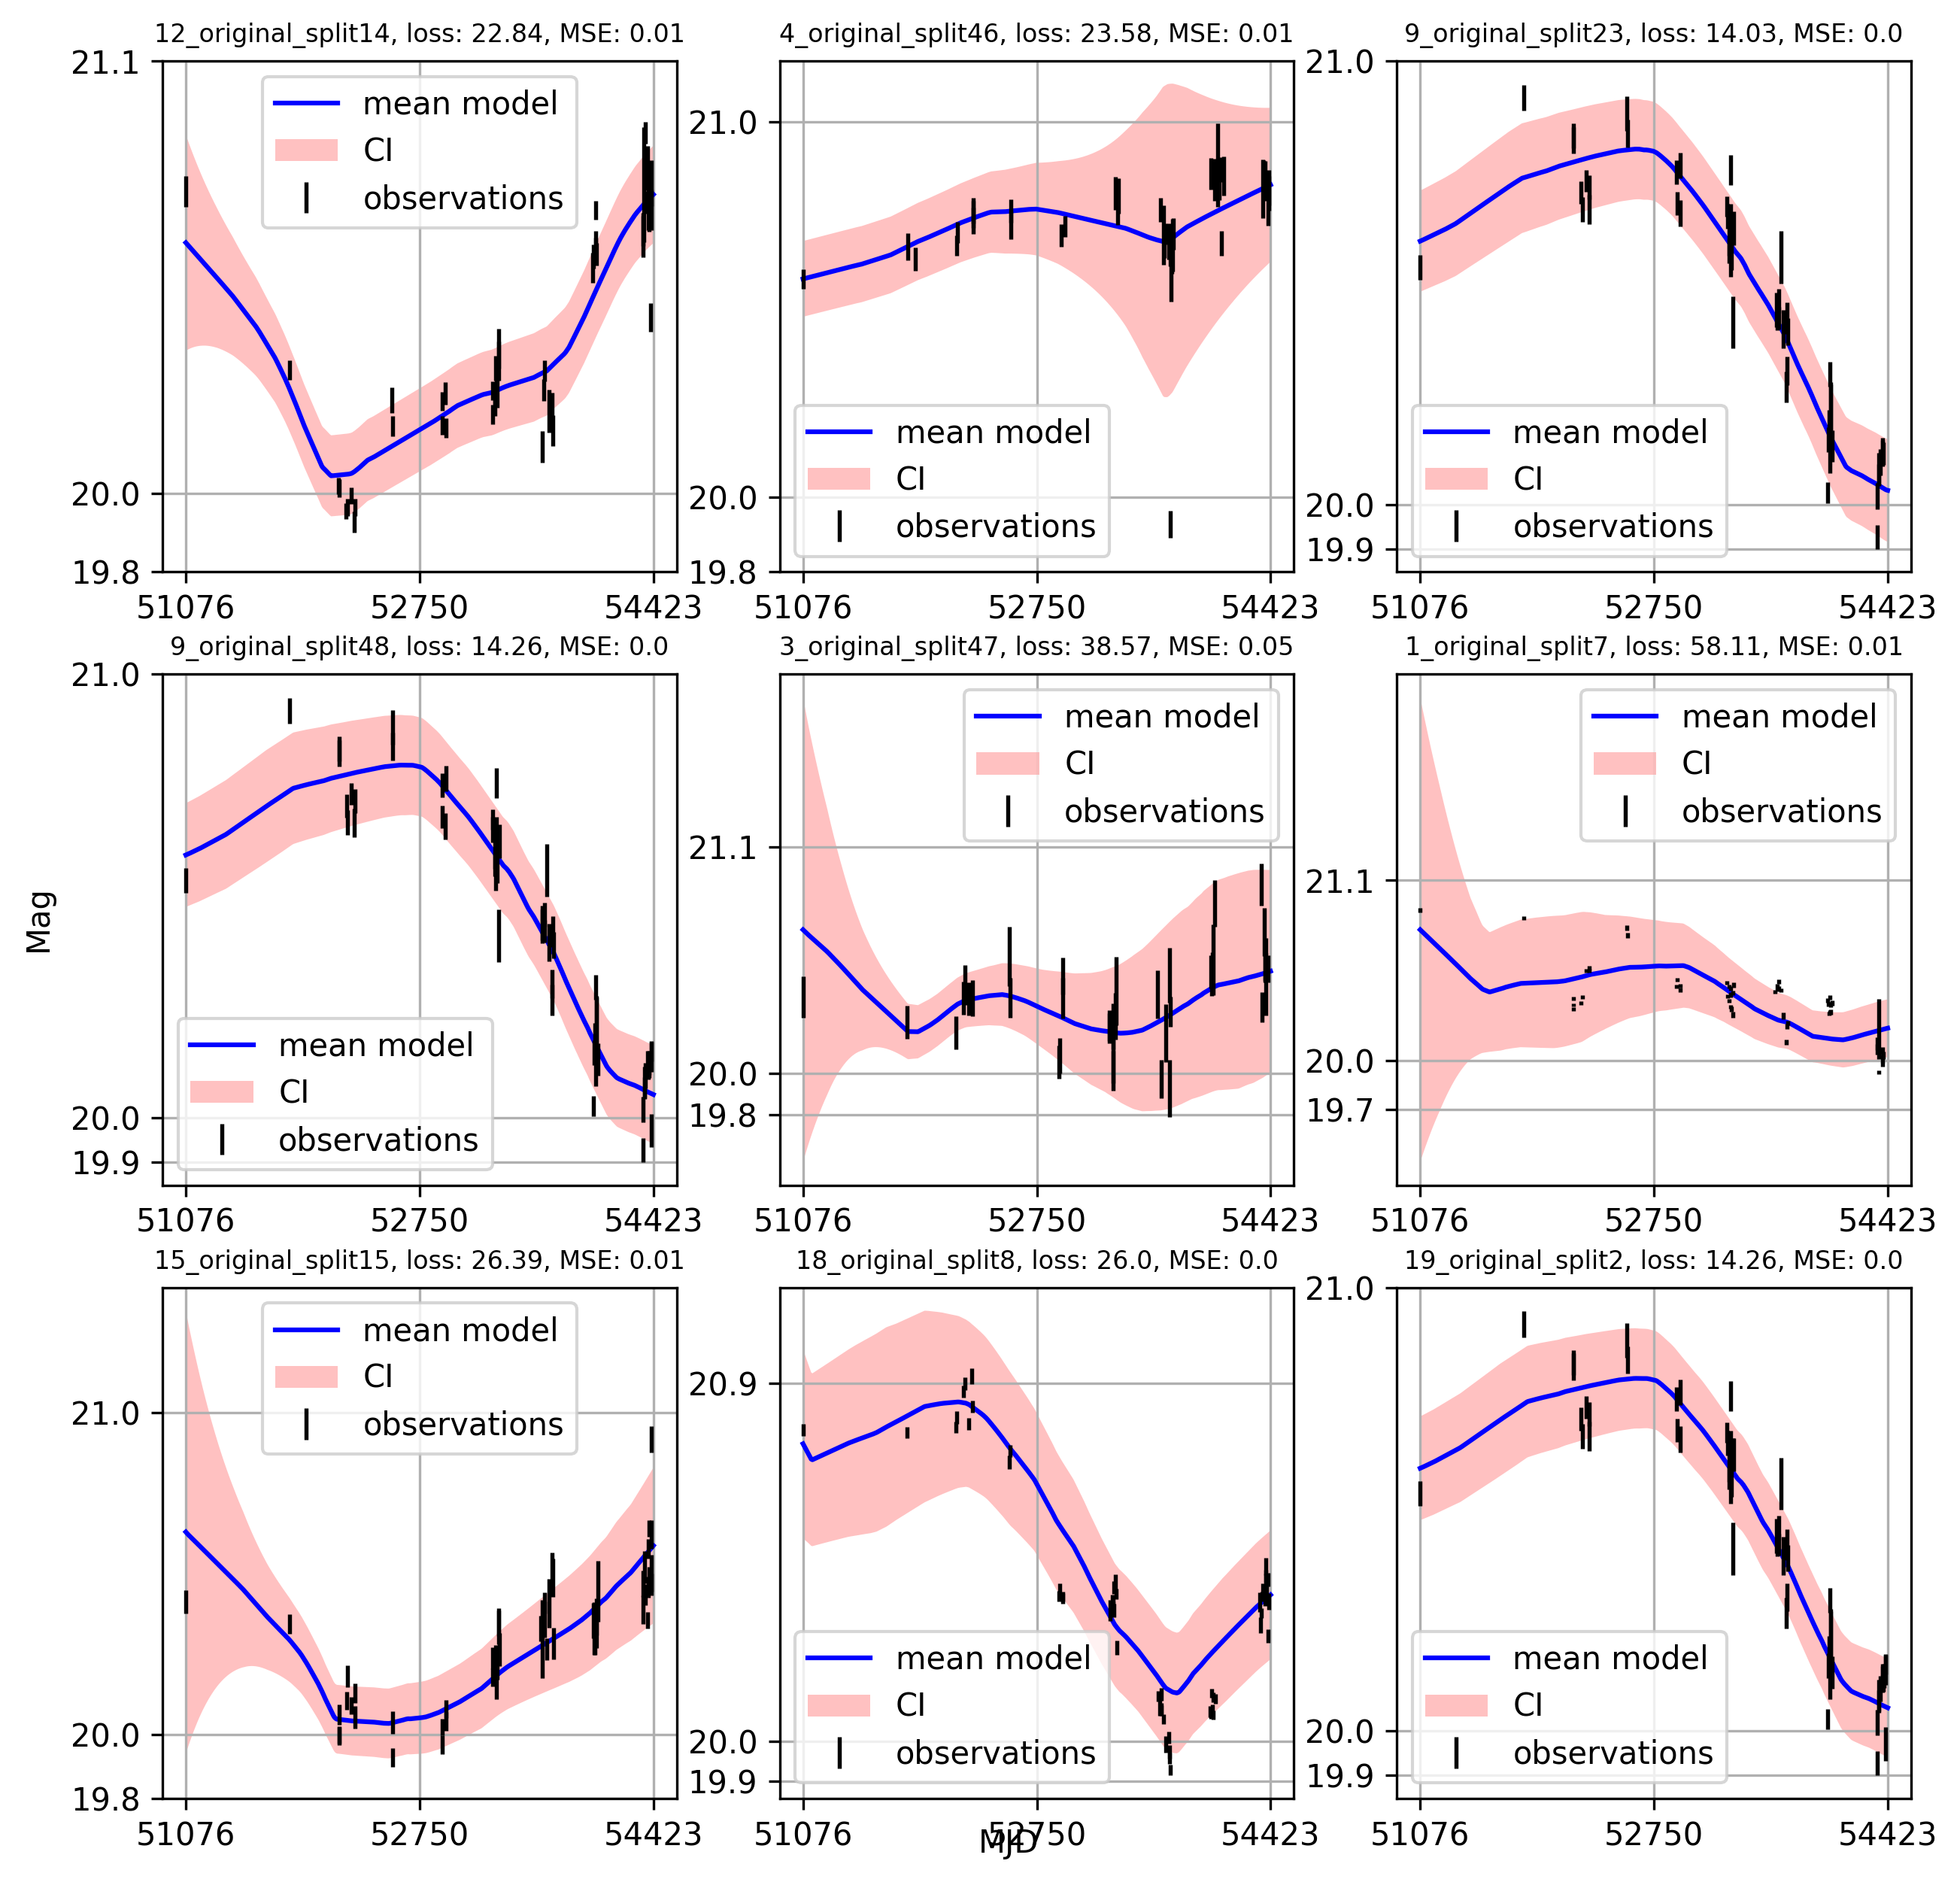

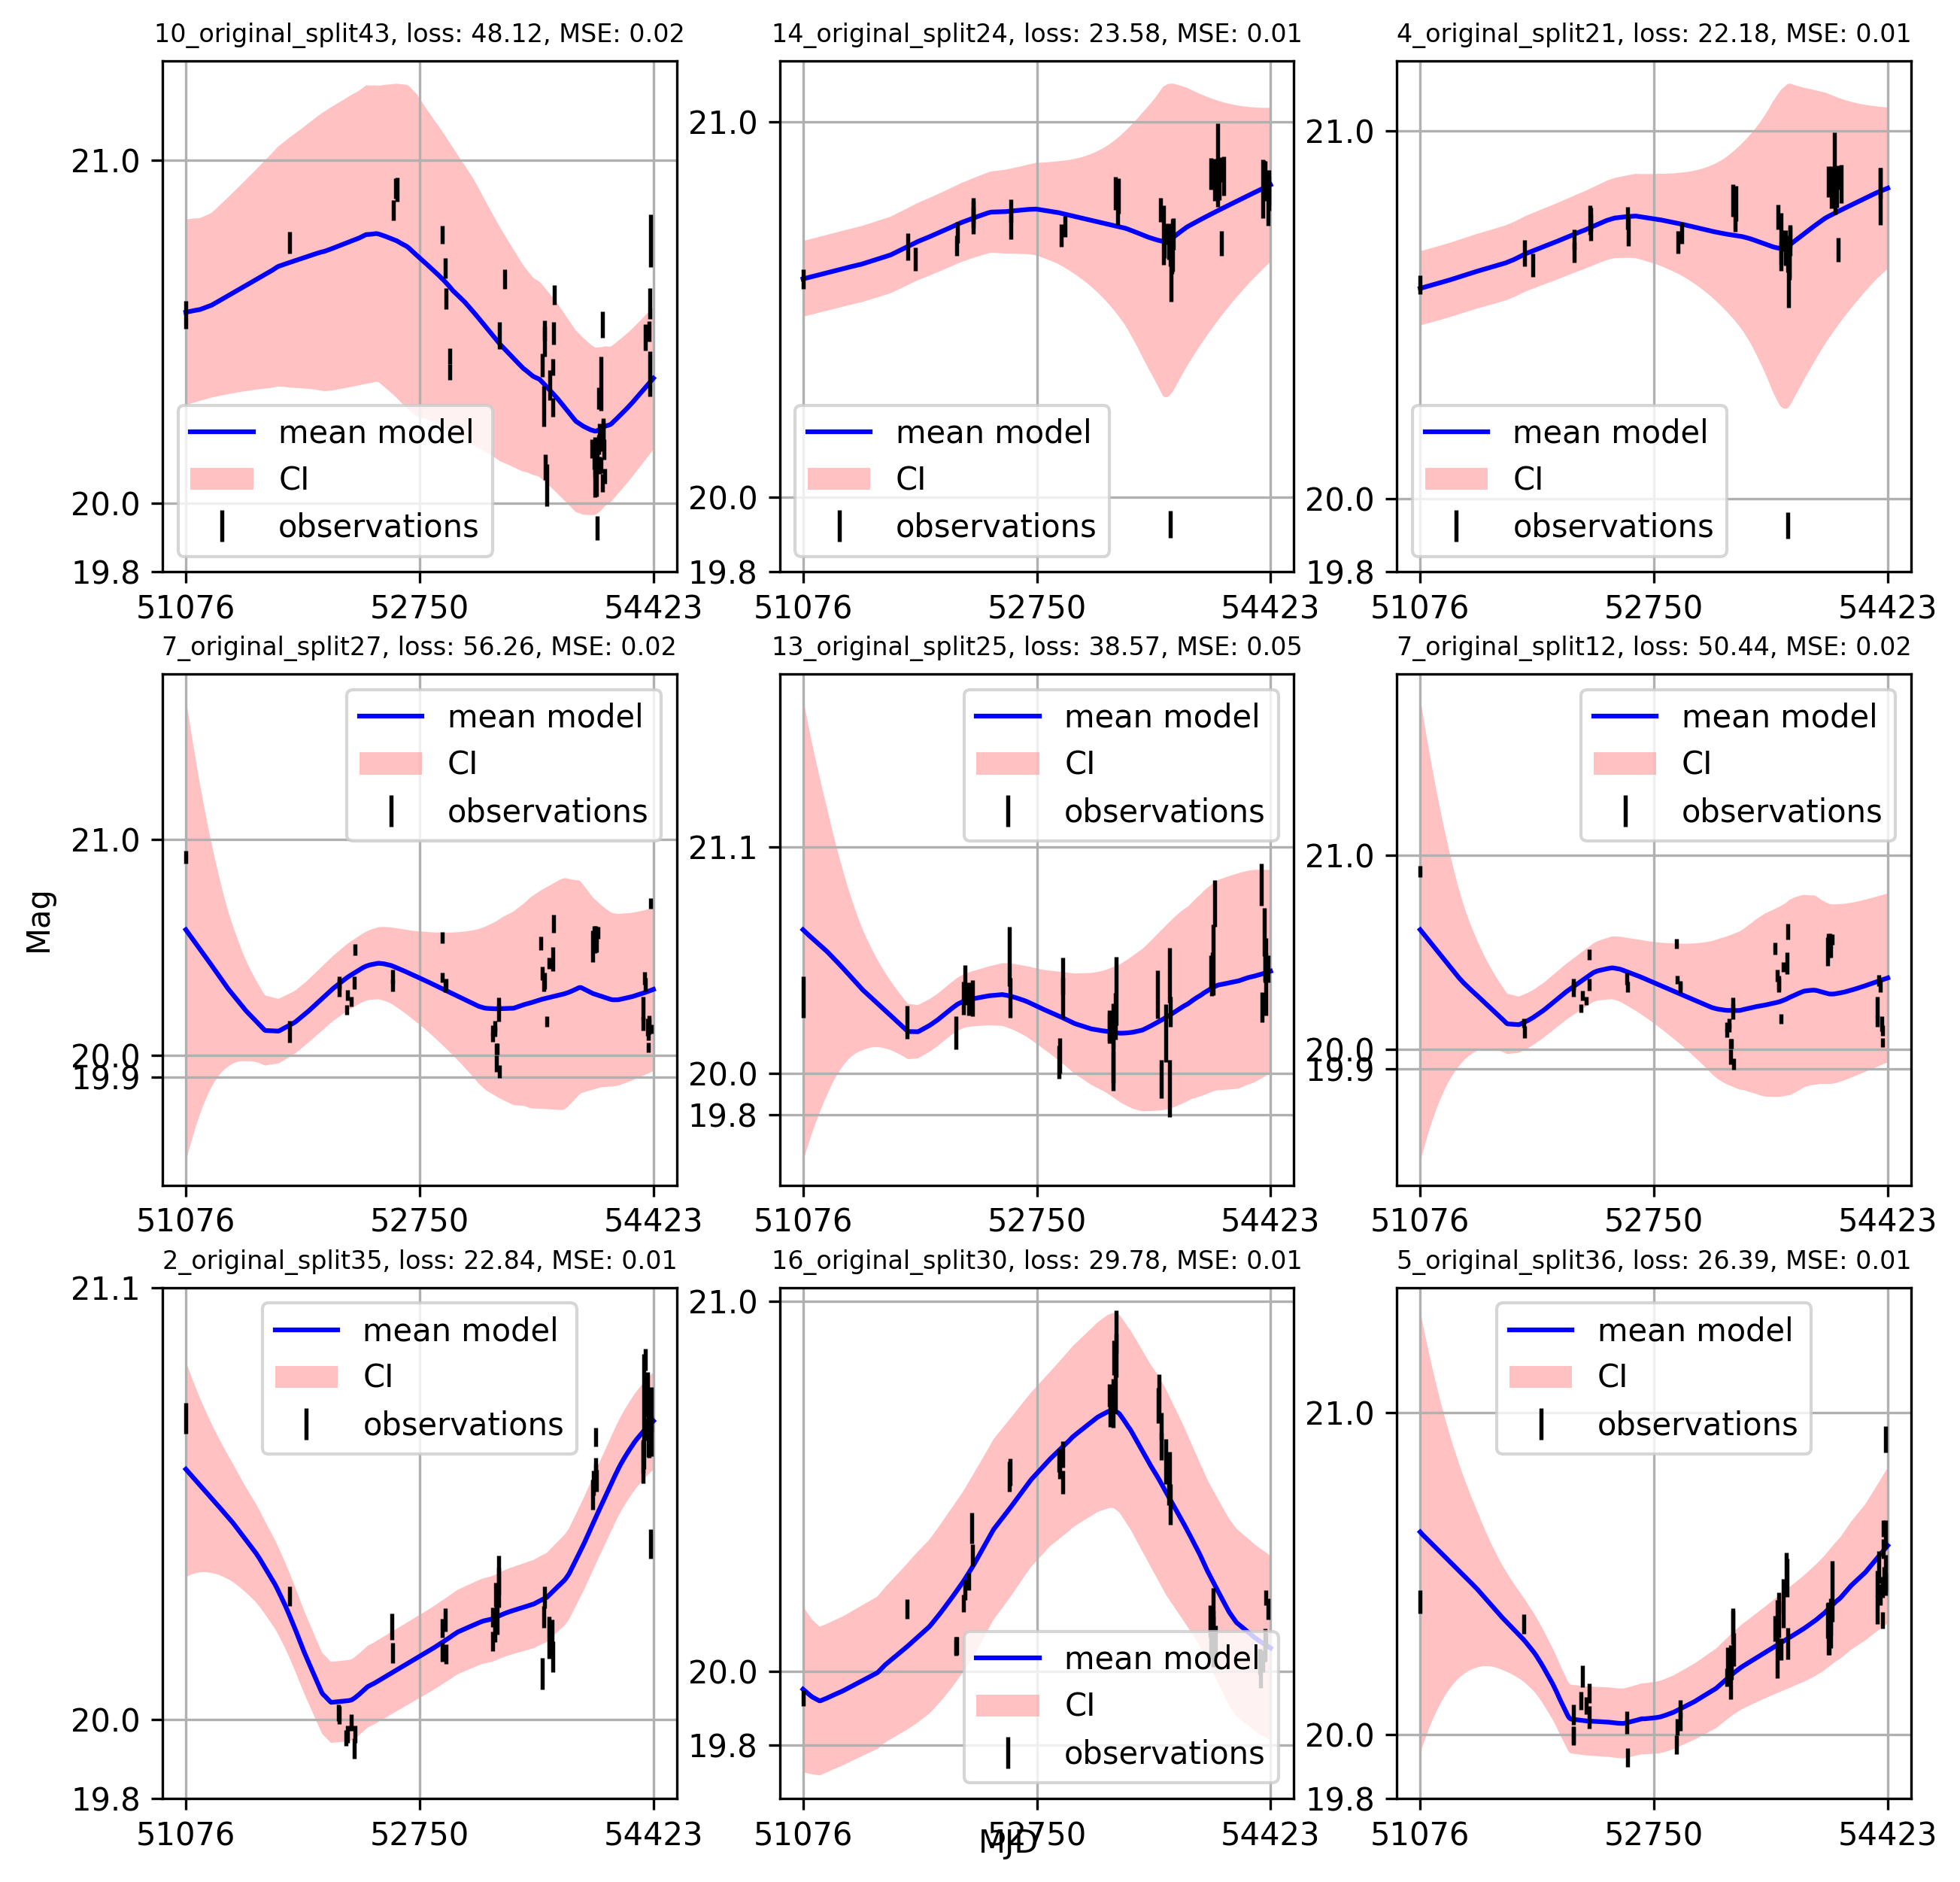

In [50]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

In [51]:
savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

  0%|                                                                                                                           | 0/8 [00:00<?, ?it/s]/Users/jamiehoskyns/opt/anaconda3/envs/task4/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:643: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 62%|███████████████████████████████████████████████████████████████████████▉                                           | 5/8 [00:00<00:00, 21.83it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 23.32it/s]


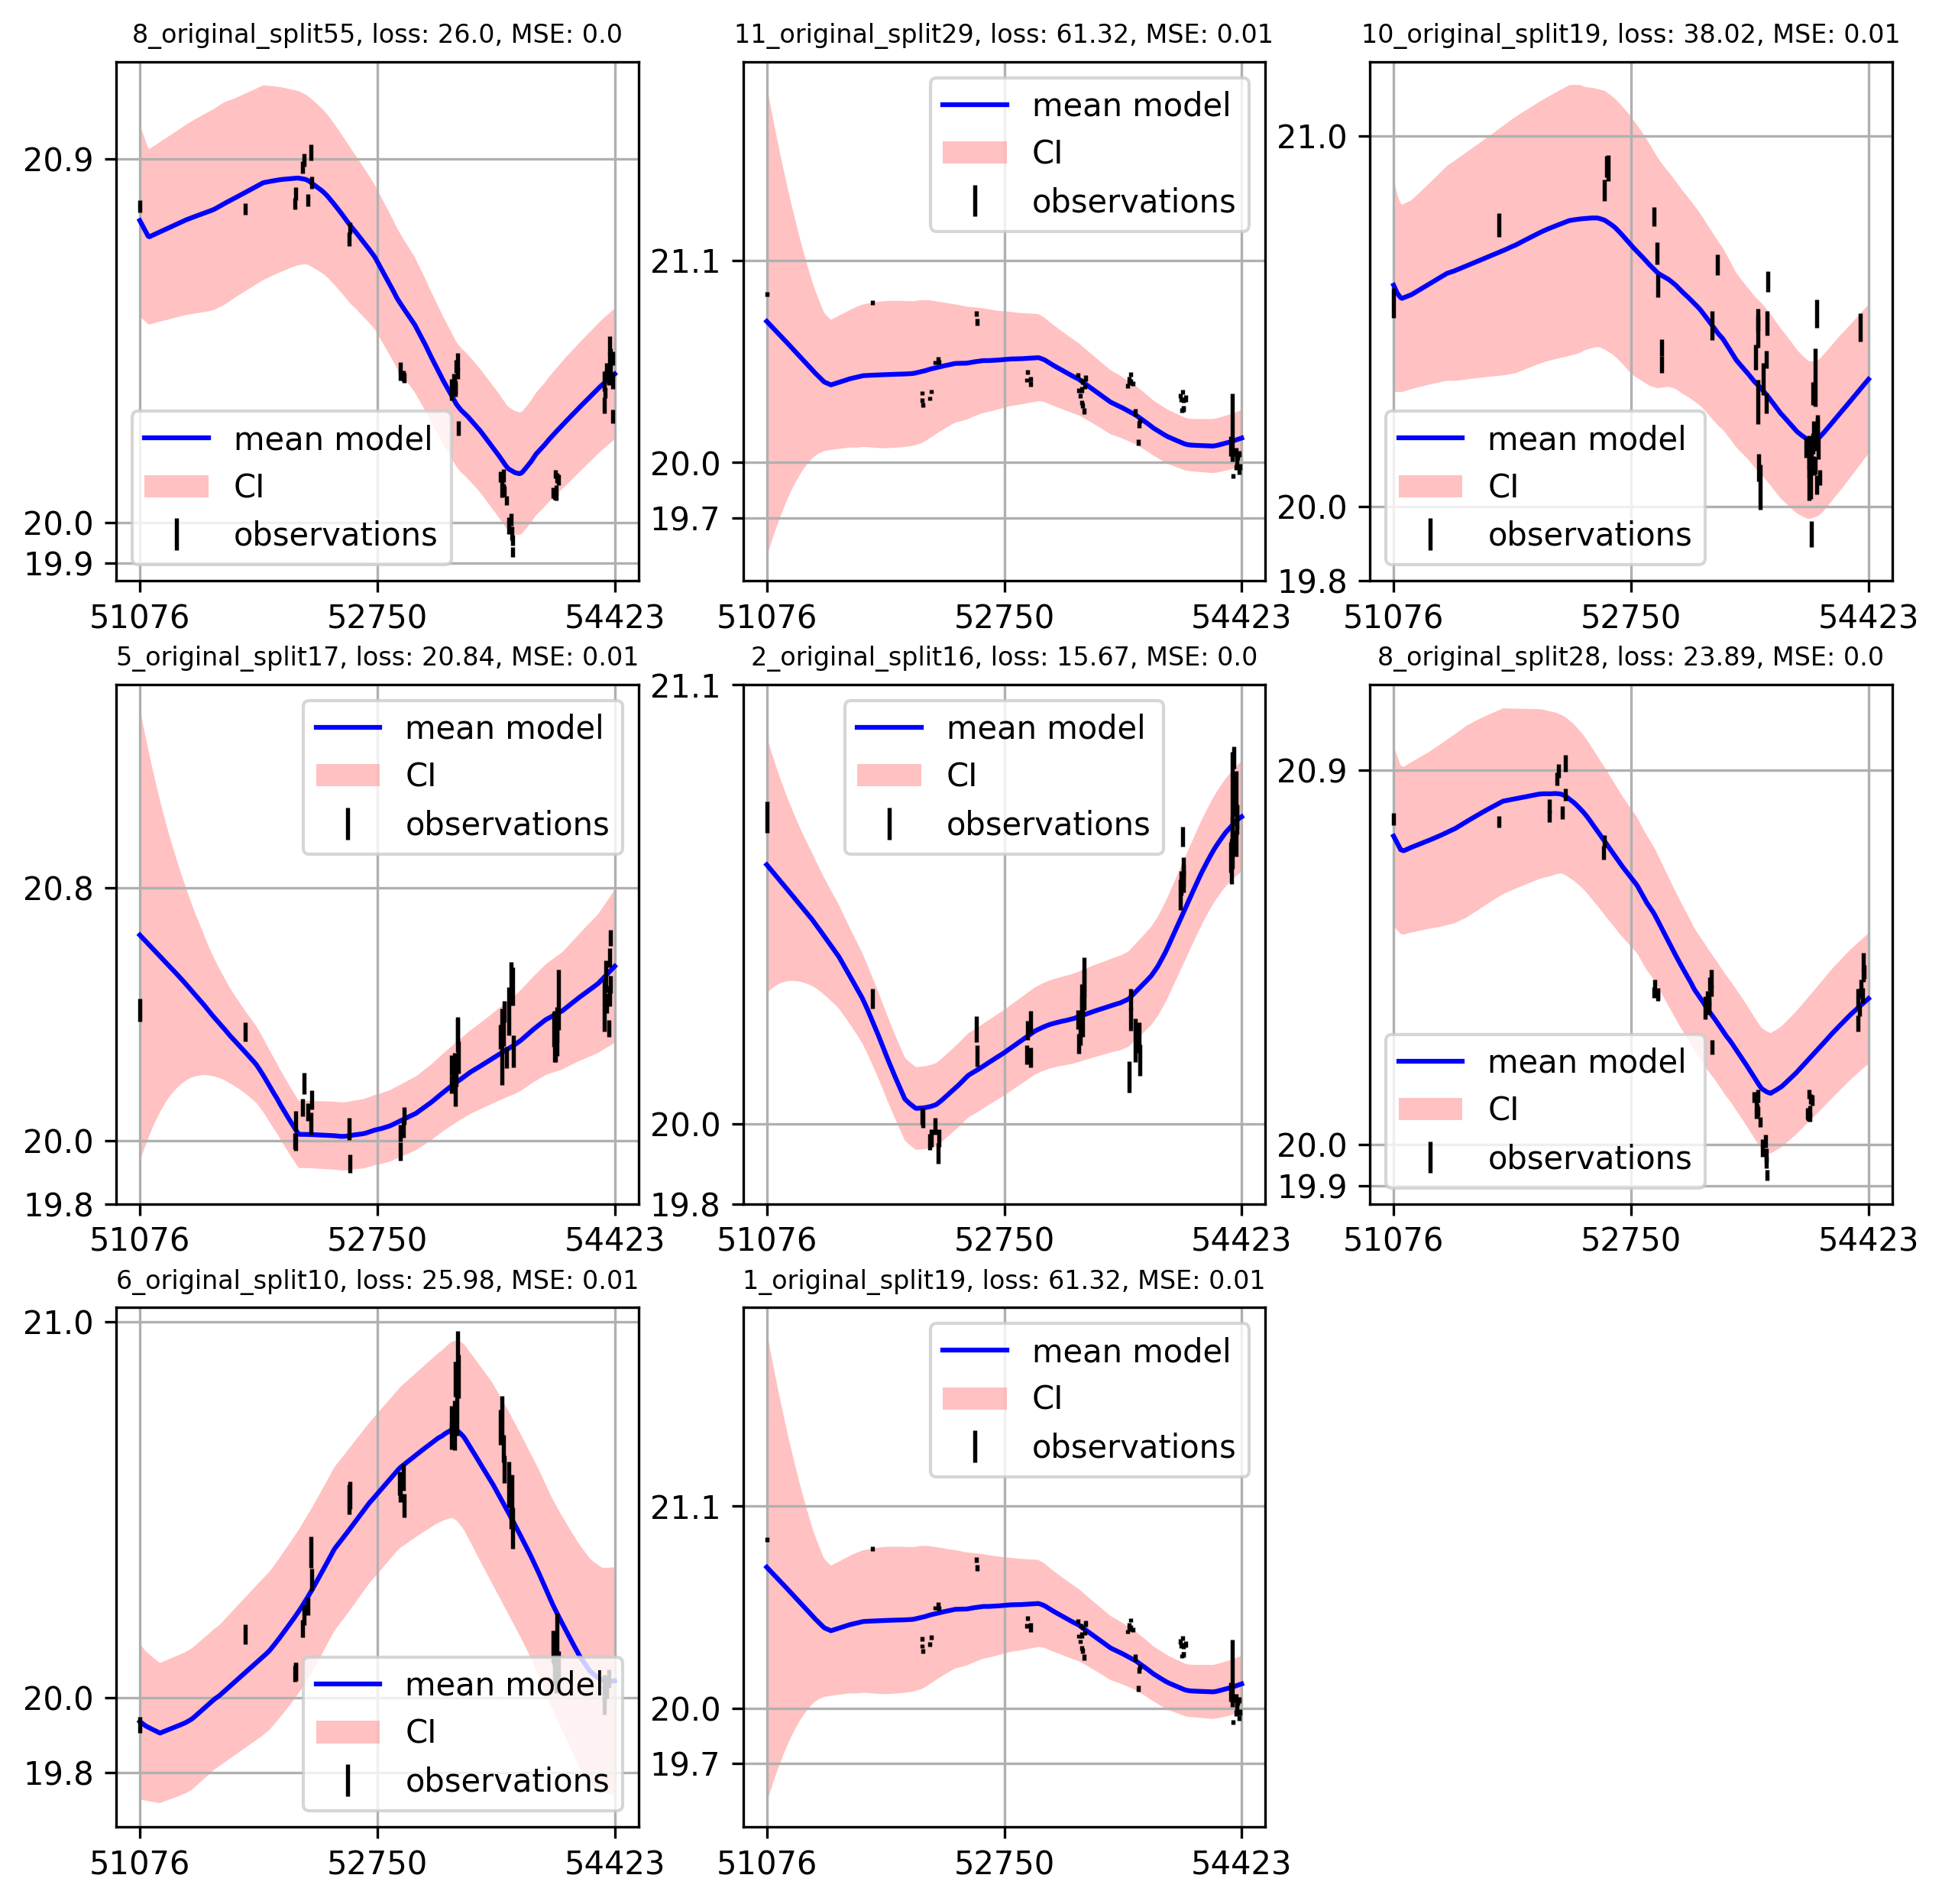

In [52]:
#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

In [53]:
saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics